<font size="+3" color=red><b> <center><u>Face Mask Detection using Transfer Learning </u></center></b></font>

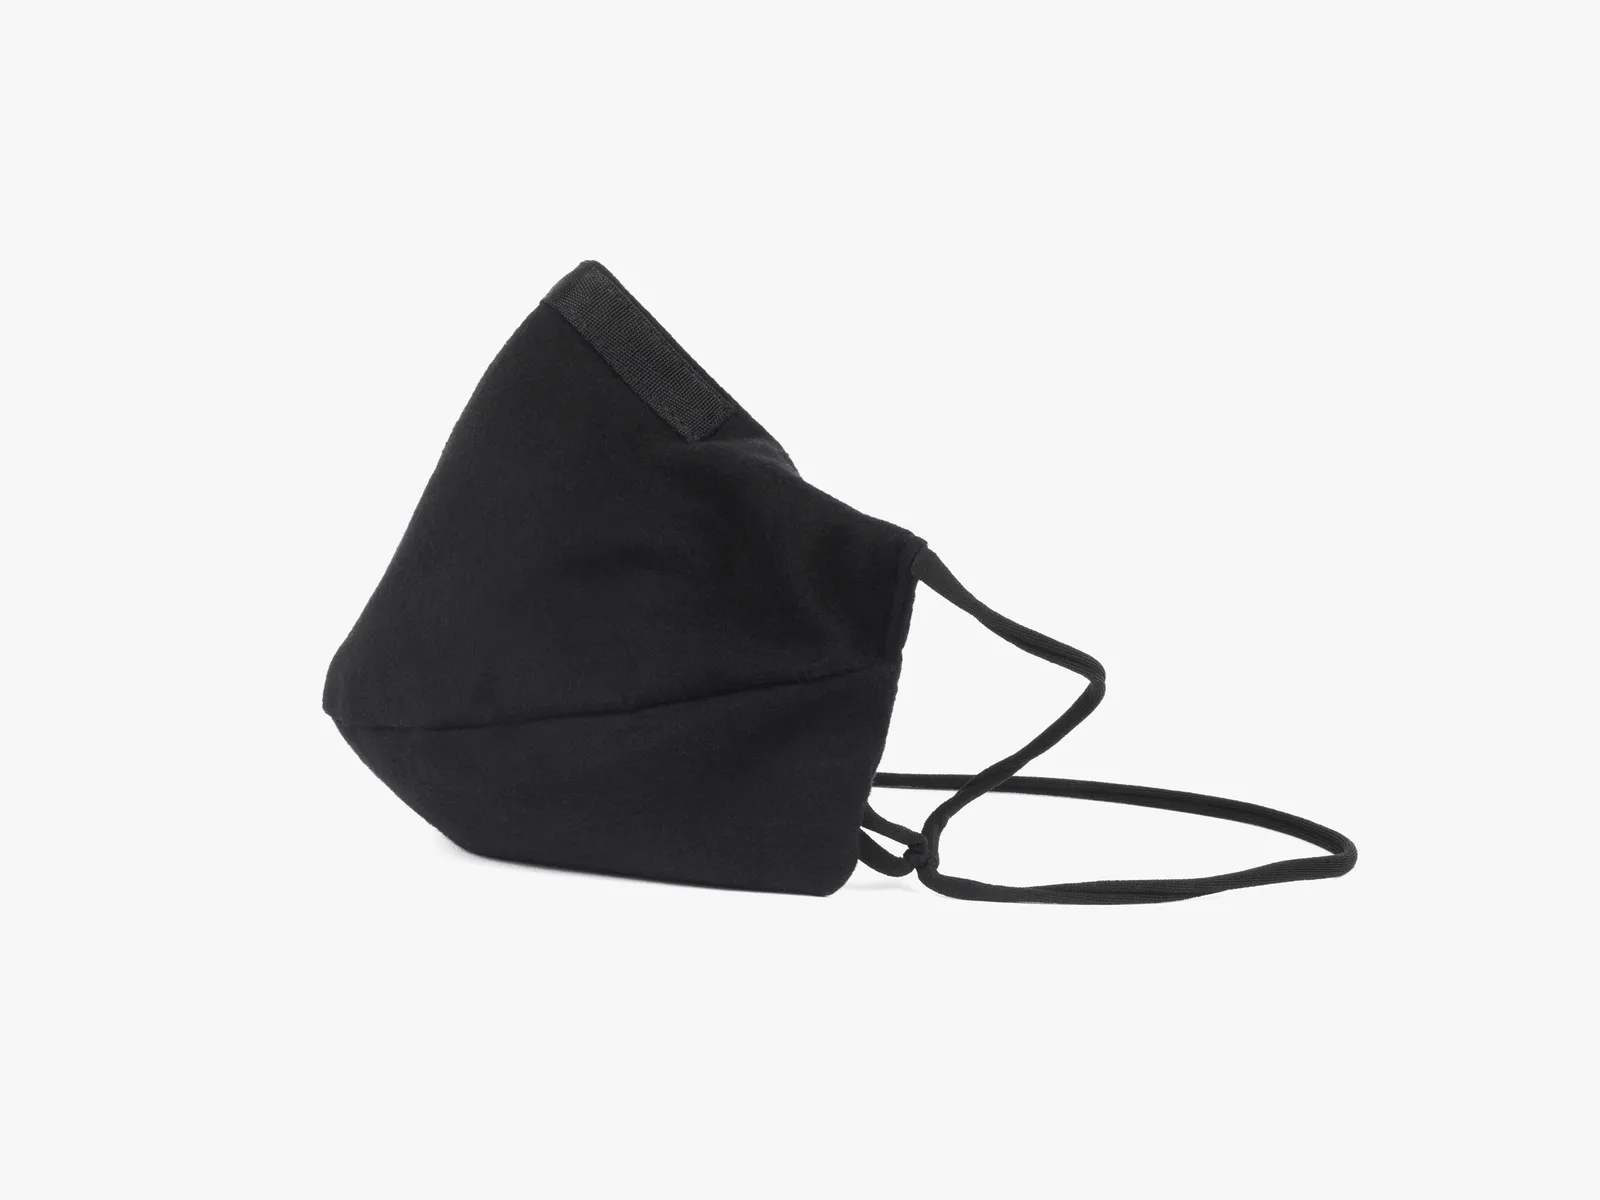

# Objective
Goal of this kernel is following:
- Learn how to implement FastAI on image data.
- Learn how to implement CNN on custom data.
- Learn how to Resnet to get better accuracy.
- Provide Perfect Guide for all the tips and trick to implement CNN and get better accuracy as a Begineer.

I have learned them from [FastAI](https://docs.fast.ai/)

<font size="+2" color=red ><b>Please <large>Upvote</large> my kernel and keep it in your favourite section if you think it is helpful.</font>

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of content</h3>

<font color="blue" size=+1><b>Introduction</b></font>
* [1. What is CNN ?](#2)
* [2. What is Transfer Learning ?](#3)    

<font color="blue" size=+1><b>Library</b></font>
* [1. Installation](#4)
* [2. Import Libraries ](#5)
    
<font color="blue" size=+1><b> Load and view your data </b></font>
* [1. Setting up path for training data ](#6)
* [2. Data Loading For training ](#7)
* [3. Data Explorations ](#8)
* [4. Print Classes present in the data ](#9)

<font color="blue" size=+1><b> Create and train a model </b></font>
* [1. Create Models ](#10)
* [2. Train Model ](#11)
* [3. Finding LR ](#12)
* [4. Finetuning HyperParameter](#13)

<font color="blue" size=+1><b> Others </b></font>
* [1. Interpret the results](#14)
* [2. Prediction Using Trained Model](#15)
* [3. Save and Load Model](#16)
* [4. Sources](#17)

<a id="1"></a>
<font color="blue" size=+2.5><b>Introduction</b></font>


<a id="2"></a>
<font color="blue" size=+2.5><b>1.2  What is CNN ?</b></font>
<br/>
<br/>
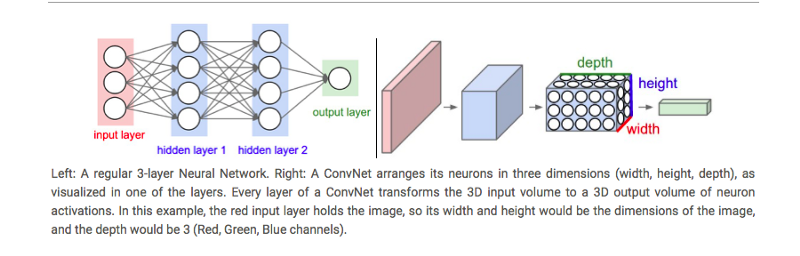
**CNN stands for Convolutional Neural Network which is a specialized neural network for processing data that has an input shape like a 2D matrix like images. CNN's are typically used for image detection and classification.**

<a id="3"></a>
<font color="blue" size=+2.5><b>1.3  What is Transfer Learning?</b></font>

**Transfer learning is the task of using a pre-trained model and applying it to a new task, i.e., transferring the knowledge learned from one task to another. This is useful because the model doesn’t have to learn from scratch and can achieve higher accuracy in less time as compared to models that don’t use transfer learning.**
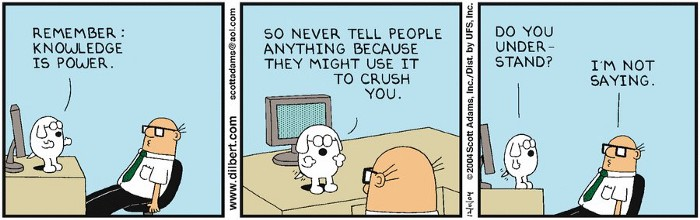
**The use of transfer learning in the machine learning domain has surged in the last few years. The following are the top reasons:**
- **Growth in the ML community and knowledge sharing**: The research and investments by top universities and tech companies have grown exponentially in the last few years and there is also a strong desire to share state-of-the-art models and datasets with the community. This allows people to utilize pre-trained models in a specific area bootstrap quickly.
- **Common sub-problems**: Another key motivator is that many problems share common sub-problems, e.g., in all visual understanding and prediction areas, tasks such as finding edges, boundaries, and background are common sub-problems. Similarly, in the text domain, the semantic understanding of textual terms can be helpful in almost all problems where the user is represented by text terms, including search, recommendation systems, ads, etc.
- **Limited supervised learning data and training resources**: Many real-world applications are still mapped onto supervised learning problems where the model is asked to predict a label. One key problem is the limited amount of training data available for models to generalize well. One key advantage of doing transfer learning is that we have the ability to start learning from pre-trained models, and hence, we can utilize the knowledge from similar domains.

<font color="blue" size=+2.5><b> Techniques for transfer learning utilization </b></font>

The transfer learning technique can be utilized in the following ways:
**Extract features from useful layers**
- Keep the initial layers of the pre-trained model and remove the final layers. Add the new layer to the remaining chunk and train them for final classification.
**Fine-tuning**
- Change or tune the existing parameters in a pre-trained network, i.e., optimizing the model parameters during training for the supervised prediction task. A key question with fine-tuning the model is to see how many layers can we freeze and how many final layers we want to fine-tune. This requires understanding the network structure of the model and role of each layer, e.g., for the image classification model we used in the Image data example, once we understand the convolution, pooling, and fully connected layers, we can decide how many final layers we need to fine-tune for our model training process.

<a id="5"></a>


<font color="blue" size=+2.5><b>2. Library</b></font>

<a id="4"></a>
<font color="blue" size=+2.5><b>2.1 Installation</b></font>
* Numpy
* Pandas
* Matplotlib
* Fastai

<a id="5"></a>
<font color="blue" size=+2.5><b>2.2 Library Import</b></font>

In [ ]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np

<a id="6"></a>
<font color="blue" size=+2.5><b>3.1 Setting up path for training data</b></font>

**Point to be Noted: Number of elements in a list of path is same as number of classes you have**

In [ ]:
x  = "../input/face-mask-dataset/data"
path = Path(x)
path.ls()

<a id="7"></a>
<font color="blue" size=+2.5><b>3.2 Data Loading For training</b></font>
<br/>

**Things to be remember:**
* Decide validation percentage ( 0.2 => 20% )
* Provide path for training data
* [Decide augmentations criteria (optional)](https://www.kaggle.com/init27/introduction-to-image-augmentation-using-fastai/)
* Decide image size (which is 224 in my case)
* Test data can also be added but it's optional

In [ ]:
np.random.seed(40)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4).normalize(imagenet_stats)

<a id="8"></a>
<font color="blue" size=+2.5><b>3.3 Data Explorations</b></font>
<br/>

*Our image dataset is stored as .jpg files in 2 different folders, with each folder bearing the name of model of the images contained in the folder. We use the ImageDataBunch.from_folder() function to load the images and assign labels the images based on the name of the folder they’re read from.*

In [ ]:
data.show_batch(rows=3, figsize=(7,6),recompute_scale_factor=True)


<a id="9"></a>
<font color="blue" size=+2.5><b>3.4 Print Classes present in the data</b></font>
<br/>

* data.c — How many classes are there in our dataset?
* len(data.train_ds) — What is the size of our training dataset?
* len(data.valid_ds) — What is the size of our validation dataset?

In [ ]:
print(data.classes)
len(data.classes)
data.c

In [ ]:
data

<a id="10"></a>
<font color="blue" size=+2.5><b>4.1 Create Model</b></font>
<br/>
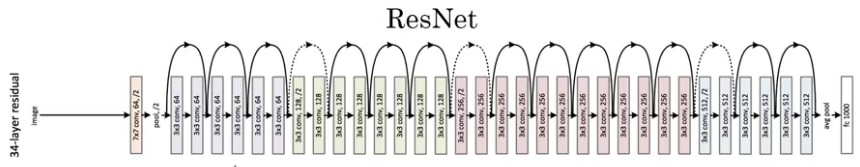
* We now use a pre-trained ResNet50 Convolutional Neural Net model, and use transfer learning to learn weights of only the last layer of the network.
* Why Transfer learning? Because with transfer learning, you begin with an existing (trained) neural network used for image recognition — and then tweak it a bit (or more) here and there to train a model for your particular use case. And why do we do that? Training a reasonable neural network would mean needing approximately 300,000 image samples, and to achieve really good performance, we’re going to need at least a million images.
* In our case, we have approximately 4000+ images in our training set — you have one guess to decide if that would have been enough if were to train a neural net from scratch.
* We use the create_cnn() function for loading a pre-trained ResNet18 network, that was trained on around a million images from the ImageNet database.

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

<a id="11"></a>
<font color="blue" size=+2.5><b>4.2 Finding LR</b></font>
<br/>

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestions=True)

<a id="12"></a>
<font color="blue" size=+2.5><b>4.3 Train Model</b></font>
<br/>

In [ ]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))

<a id="13"></a>
<font color="blue" size=+2.5><b>4.4 Hyper Parameter Tuning</b></font>
<br/>

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10,slice(1e-4,1e-3))

In [ ]:
learn.recorder.plot_losses()

<a id="14"></a>
<font color="blue" size=+2.5><b>5.1 Interpret the results</b></font>
<br/>

Model performance can be validated in different ways. One of the popular methods is using the confusion matrix. Diagonal values of the matrix indicate correct predictions for each class, whereas other cell values indicate a number of wrong predictions.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(6,figsize = (25,5))

<a id="16"></a>
<font color="blue" size=+2.5><b>5.3 Save and Load Model</b></font>
<br/>


Once you have trained the model and satisfied with the outcome, its time to deploy the model. For deploying the model into production you need to save your model architecture and the parameters it’s trained on. For this, the export method is used. The exported model is saved as a PKL file, which is a file created by pickle (a Python module).

In [ ]:
learn.export(file = Path("/kaggle/working/export.pkl"))
learn.model_dir = "/kaggle/working"
learn.save("stage-1",return_path=True)

<a id="17"></a>
<font color="blue" size=+2.5><b>5.4 Sources</b></font>
<br/>
* [Fastai MOOC](https://course.fast.ai/)
* [Fastai library](https://docs.fast.ai/)

<a id="18"></a>
<font color="blue" size=+2.5><b>Feedback and Support</b></font>
<br/>
* Your feedback is much appreciated
* Please UPVOTE if you LIKE this notebook
* Comment if you have any doubts or you found any errors in the notebook

### If these kernels impress you,give them an <font size="+3" color="red"><b>Upvote</b></font>.<br>

<a href="#top" class="btn btn-success btn-lg active" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOP</a>